In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [73]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## Data Prepration

In [74]:


df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

customer_data = df.groupby('CustomerID').agg(
    TotalRevenue=pd.NamedAgg(column='TotalRevenue', aggfunc='sum'),
    TotalQuantityPurchased=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    UniqueProductsPurchased=pd.NamedAgg(column='StockCode', aggfunc='nunique'),
    NumberOfTransactions=pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
   
).reset_index()

print(customer_data)


      CustomerID  TotalRevenue  TotalQuantityPurchased  \
0        12346.0          0.00                       0   
1        12347.0       4310.00                    2458   
2        12348.0       1797.24                    2341   
3        12349.0       1757.55                     631   
4        12350.0        334.40                     197   
...          ...           ...                     ...   
4367     18280.0        180.60                      45   
4368     18281.0         80.82                      54   
4369     18282.0        176.60                      98   
4370     18283.0       2094.88                    1397   
4371     18287.0       1837.28                    1586   

      UniqueProductsPurchased  NumberOfTransactions  
0                           1                     2  
1                         103                     7  
2                          22                     4  
3                          73                     1  
4                          17    

In [75]:
customer_data=pd.concat([customer_data,df[['Country']]],axis=1)
customer_data=customer_data.head(4372)

In [76]:

customer_data

,CustomerID,TotalRevenue,TotalQuantityPurchased,UniqueProductsPurchased,NumberOfTransactions,Country
0,12346.0,0.00,0.0,1.0,2.0,United Kingdom
1,12347.0,4310.00,2458.0,103.0,7.0,United Kingdom
2,12348.0,1797.24,2341.0,22.0,4.0,United Kingdom
3,12349.0,1757.55,631.0,73.0,1.0,United Kingdom
4,12350.0,334.40,197.0,17.0,1.0,United Kingdom
...,...,...,...,...,...,...
4367,18280.0,180.60,45.0,10.0,1.0,United Kingdom
4368,18281.0,80.82,54.0,7.0,1.0,United Kingdom
4369,18282.0,176.60,98.0,12.0,3.0,United Kingdom
4370,18283.0,2094.88,1397.0,263.0,16.0,United Kingdom


## Basic Check 

In [77]:
customer_data.describe()

,CustomerID,TotalRevenue,TotalQuantityPurchased,UniqueProductsPurchased,NumberOfTransactions
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,1122.344007,61.211116,5.075480
std,1722.390705,8219.345141,4672.790720,85.425119,9.338754
min,12346.000000,-4287.630000,-303.000000,1.000000,1.000000
25%,13812.750000,293.362500,153.000000,15.000000,1.000000
50%,15300.500000,648.075000,365.000000,35.000000,3.000000
75%,16778.250000,1611.725000,962.250000,77.000000,5.000000
max,18287.000000,279489.020000,196719.000000,1794.000000,248.000000


In [78]:
customer_data.describe(include='O')

,Country
count,4372
unique,7
top,United Kingdom
freq,4212


## EDA

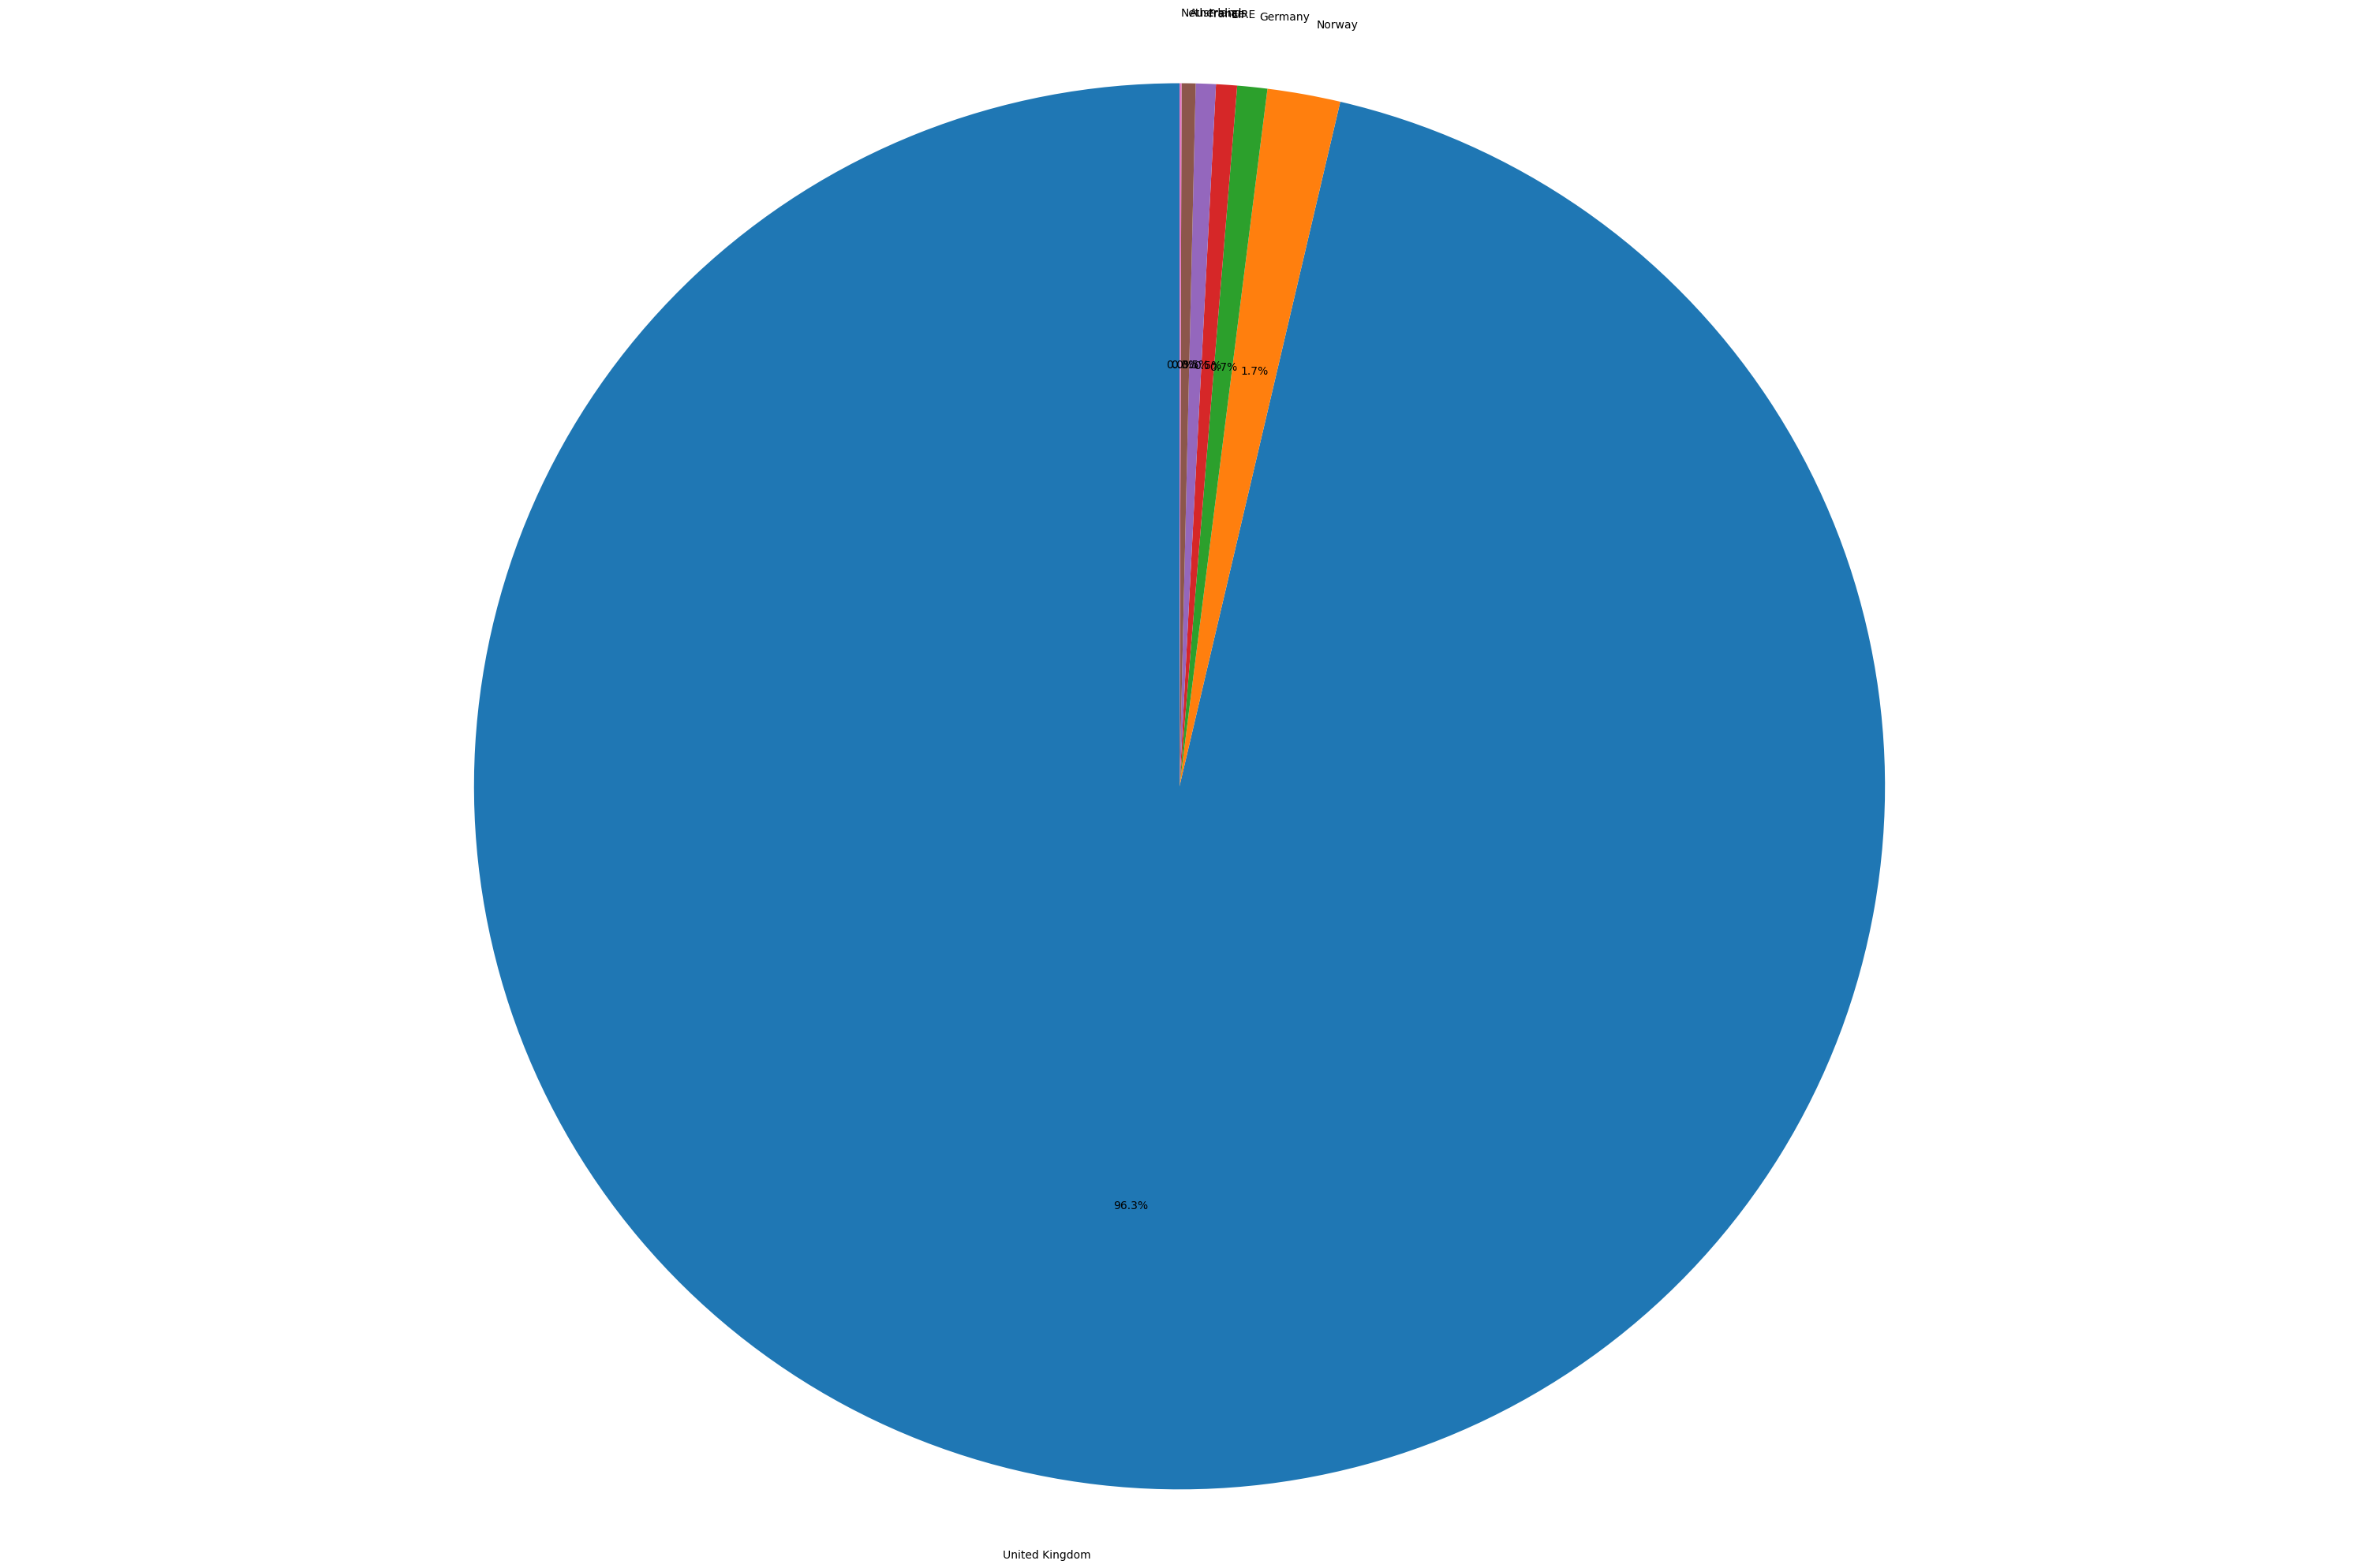

In [90]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value in the 'Country' column
country_counts = customer_data['Country'].value_counts()

# Plot pie chart
plt.figure(figsize=(30,20))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

plt.tight_layout()
plt.show()


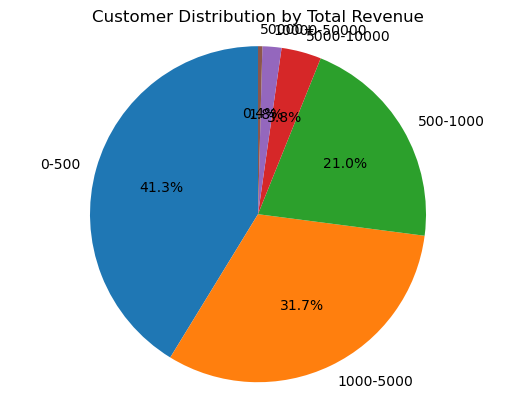

In [91]:
# Categorize TotalRevenue into bins
revenue_bins = pd.cut(customer_data['TotalRevenue'], bins=[0, 500, 1000, 5000, 10000, 50000, float('inf')], 
                      labels=['0-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000+'])

# Count the occurrences in each revenue bin
revenue_counts = revenue_bins.value_counts()

# Plot pie chart
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', startangle=90)

# Display the pie chart
plt.axis('equal')
plt.title('Customer Distribution by Total Revenue')
plt.show()


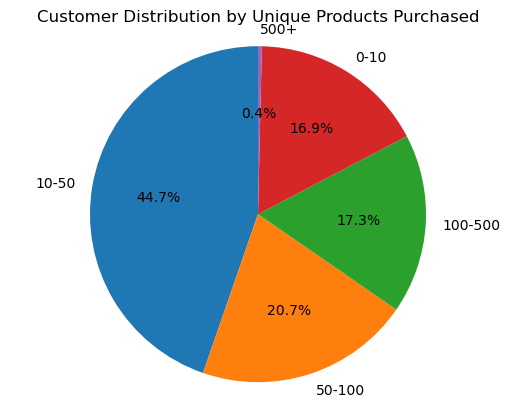

In [92]:
# Categorize UniqueProductsPurchased into bins
products_bins = pd.cut(customer_data['UniqueProductsPurchased'], bins=[0, 10, 50, 100, 500, float('inf')], 
                       labels=['0-10', '10-50', '50-100', '100-500', '500+'])

# Count occurrences in each bin
products_counts = products_bins.value_counts()

# Plot pie chart
plt.pie(products_counts, labels=products_counts.index, autopct='%1.1f%%', startangle=90)

# Display the pie chart
plt.axis('equal')
plt.title('Customer Distribution by Unique Products Purchased')
plt.show()


## univariate Analysis

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

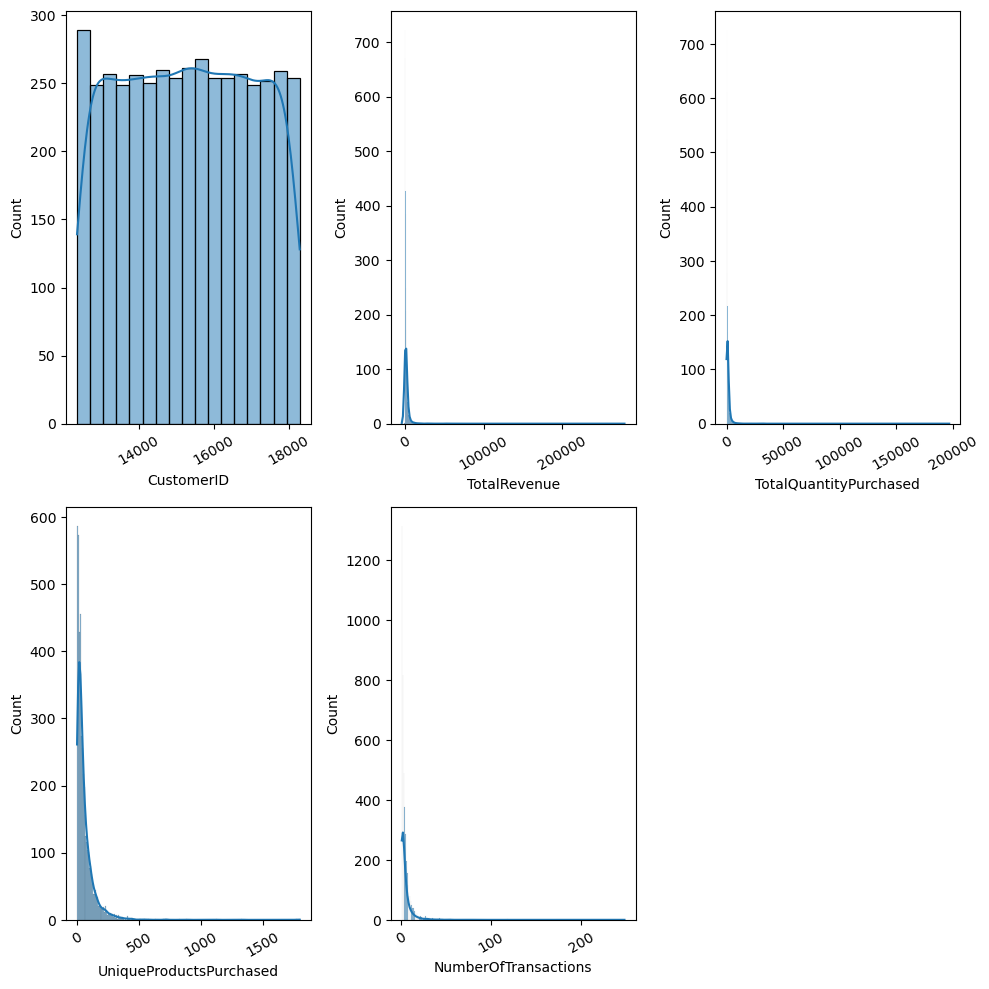

In [101]:
x=customer_data.drop('Country',axis=1)
plt.figure(figsize=(10,10))
plotnumber=1
for i in x:
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=x[i],kde=True)
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()
    

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Country', ylabel='count'>

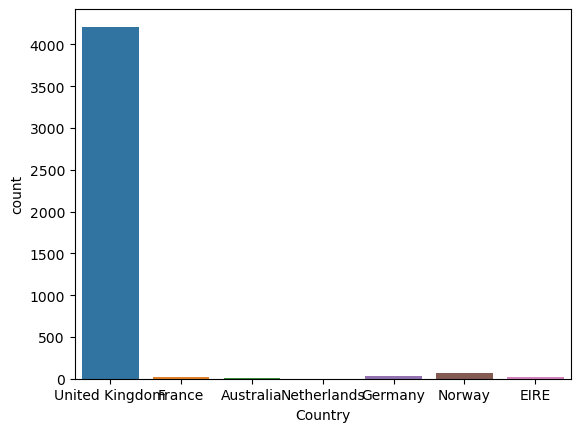

In [102]:
sns.countplot(x=customer_data.Country)

## Data Preprocessing

### Handling with null values and Crroupted Data

In [104]:
customer_data.isnull().sum()

CustomerID                 0
TotalRevenue               0
TotalQuantityPurchased     0
UniqueProductsPurchased    0
NumberOfTransactions       0
Country                    0
dtype: int64

### Handling with outliers

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

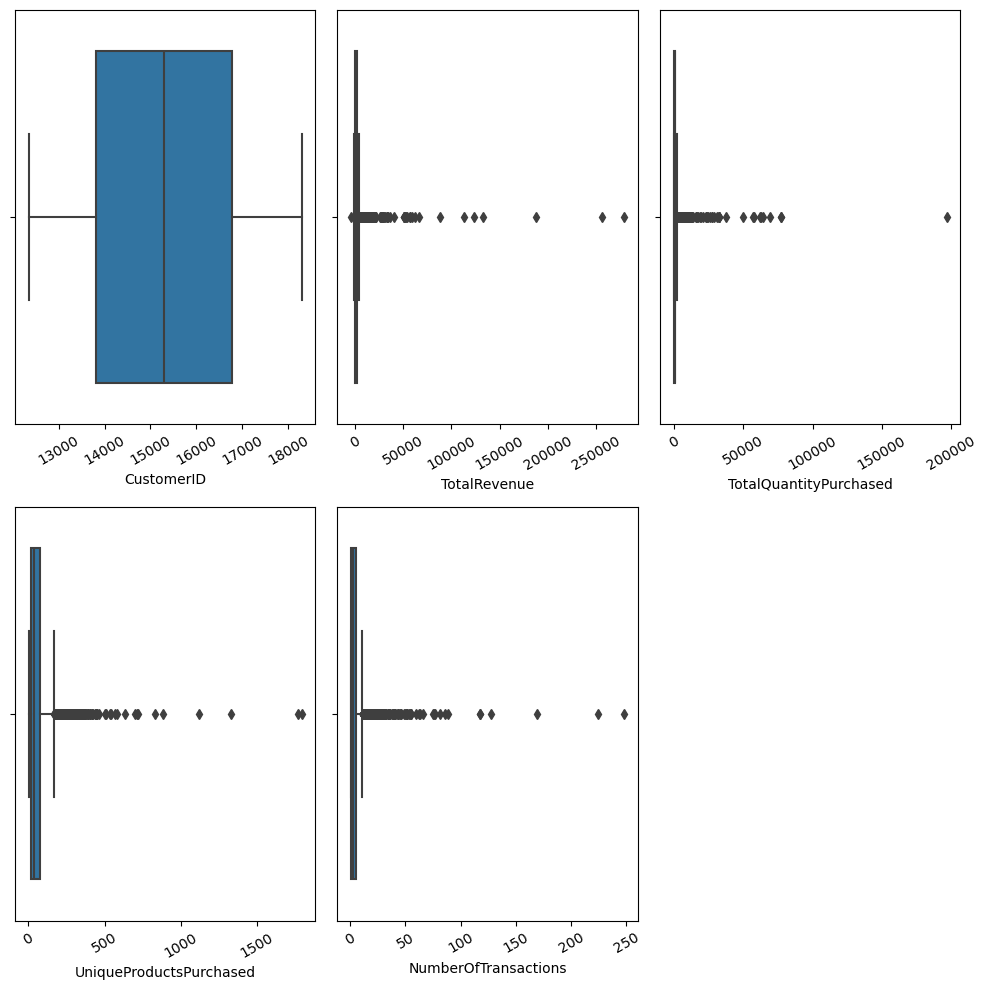

In [106]:
#x=customer_data.drop('Country',axis=1)
plt.figure(figsize=(10,10))
plotnumber=1
for i in x:
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x=x[i])
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()
    

### Conversion of categorical  data into numrical data

In [110]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder()

In [116]:
customer_data.Country=OHE.fit_transform(customer_data[['Country']])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

In [115]:
customer_data

,CustomerID,TotalRevenue,TotalQuantityPurchased,UniqueProductsPurchased,NumberOfTransactions,Country
0,12346.0,0.00,0.0,1.0,2.0,United Kingdom
1,12347.0,4310.00,2458.0,103.0,7.0,United Kingdom
2,12348.0,1797.24,2341.0,22.0,4.0,United Kingdom
3,12349.0,1757.55,631.0,73.0,1.0,United Kingdom
4,12350.0,334.40,197.0,17.0,1.0,United Kingdom
...,...,...,...,...,...,...
4367,18280.0,180.60,45.0,10.0,1.0,United Kingdom
4368,18281.0,80.82,54.0,7.0,1.0,United Kingdom
4369,18282.0,176.60,98.0,12.0,3.0,United Kingdom
4370,18283.0,2094.88,1397.0,263.0,16.0,United Kingdom
